In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_1samp
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
import warnings

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\MTR\OneDrive\Desktop\Machine Learning\Session file\Student_Performance.csv")

# Step 1: Exploratory Data Analysis (EDA)

Step 1.1: Check Distribution of Each Field

In [4]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [6]:
df['Performance Index'].value_counts()  #Target variable

Performance Index
67.0     187
45.0     185
49.0     181
56.0     181
40.0     180
        ... 
14.0       7
99.0       6
11.0       5
100.0      3
10.0       1
Name: count, Length: 91, dtype: int64

In [7]:
# Quick summary to get an overview of numerical columns
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
# Step 1.1: Categorical and Numerical Columns Identification
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [9]:
num_cols

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

In [5]:
# Check unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {df[col].unique()}")

Extracurricular Activities has ['Yes' 'No']


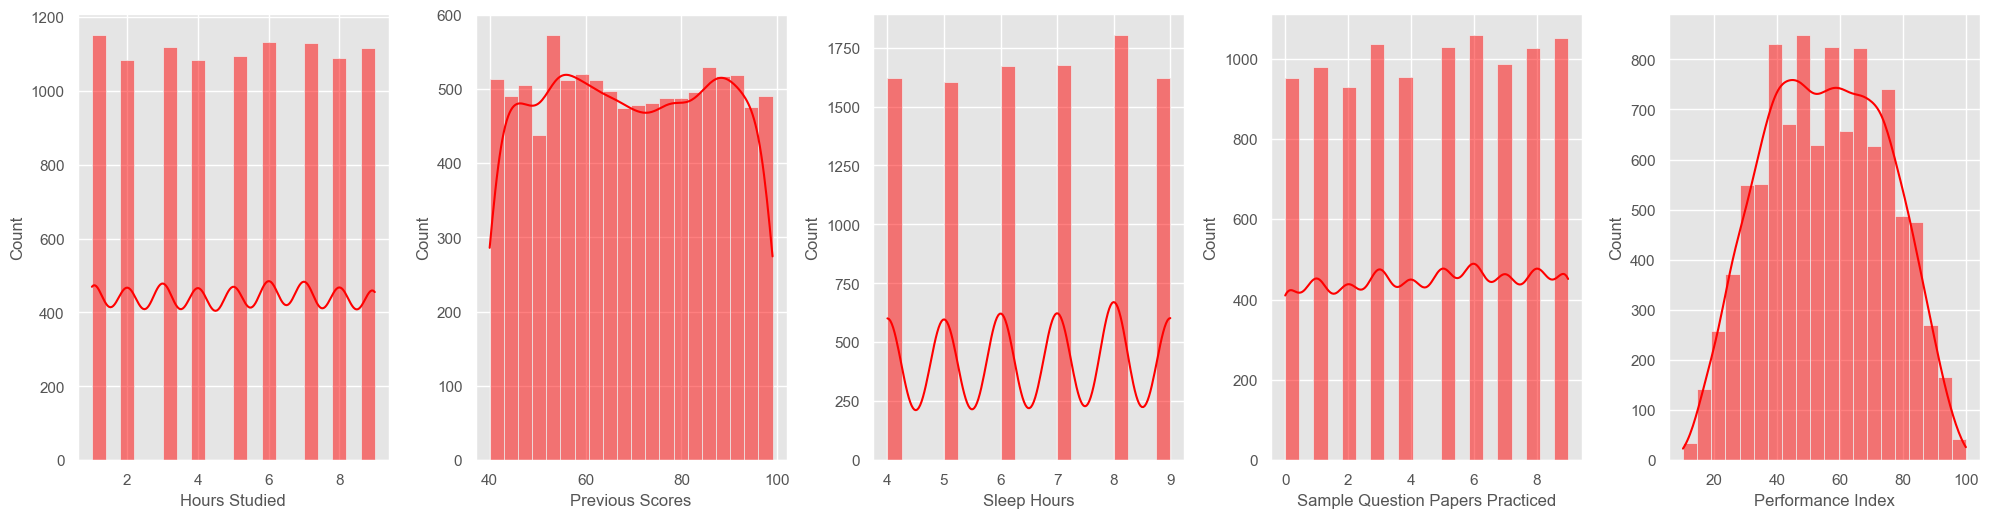

In [12]:
# Step 1.3: Visualizing Distributions of Numerical Features
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column], bins=20, ax=ax, kde=True, color="red")
        ax.set_xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

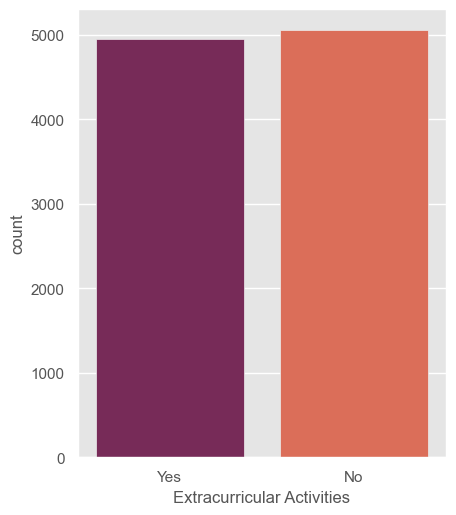

In [13]:
# Step 1.4: Categorical Distributions
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(x=df[column], palette='rocket')
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [15]:
from scipy.stats import shapiro
normality_results = {}
# Step 1.2: Check Normality using Shapiro-Wilk Test
for column in num_cols:
    clean_data = df[column].dropna()  # Remove NaN values for test
    shapiro_stat, p_value = shapiro(clean_data)
    normality_results[col] = p_value
    print(f"SW Test for {column}: Statistic={shapiro_stat}, P-value={p_value}")
# Displaying normality test results
print(pd.DataFrame.from_dict(normality_results, orient='index', columns=['p-value']))

SW Test for Hours Studied: Statistic=0.930761403611179, P-value=1.8970266141196197e-55
SW Test for Previous Scores: Statistic=0.9532227021032802, P-value=1.5858149804984002e-48
SW Test for Sleep Hours: Statistic=0.9078263648529793, P-value=8.451713707125996e-61
SW Test for Sample Question Papers Practiced: Statistic=0.9358836337156052, P-value=4.702110235841429e-54
SW Test for Performance Index: Statistic=0.9842938162925607, P-value=9.059550837060746e-32
                                 p-value
Extracurricular Activities  9.059551e-32


The Shapiro-Wilk test checks for normality, with a p-value below 0.05 suggesting non-normality.

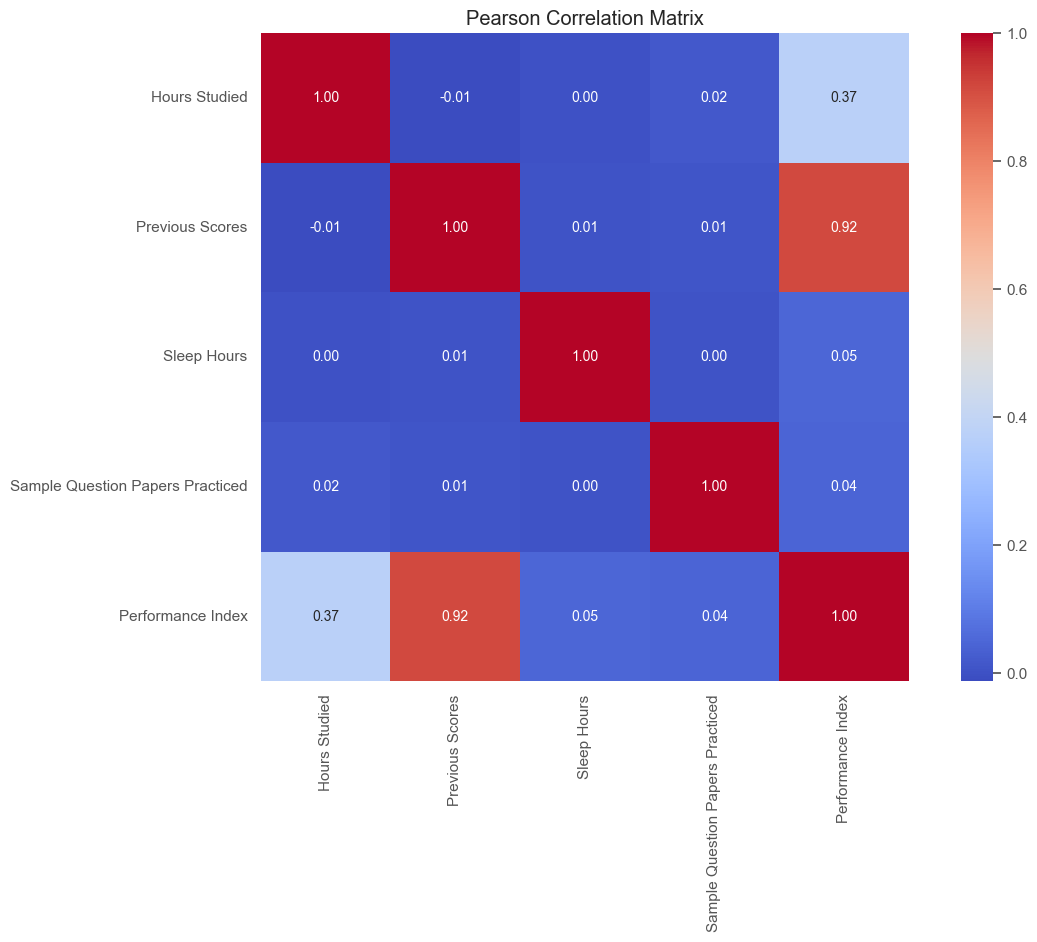

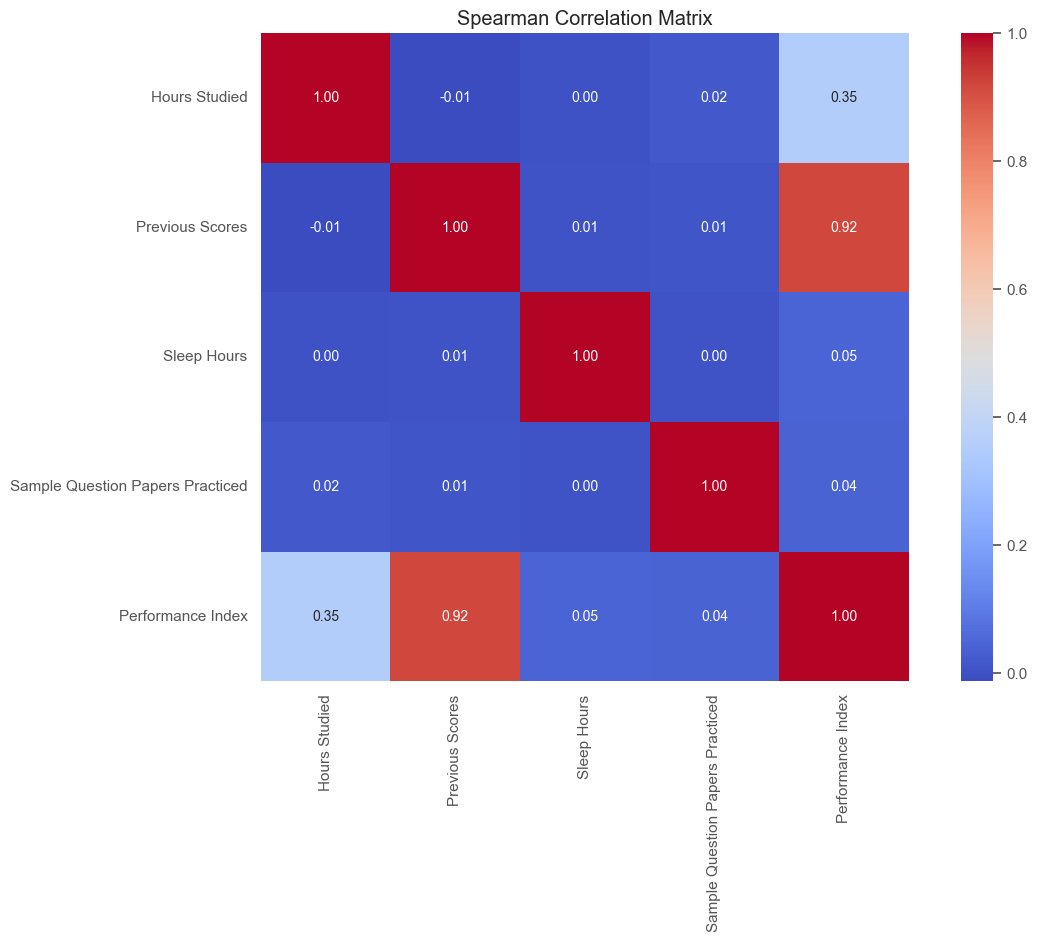

In [16]:
# Pearson correlation
pearson_corr = df[num_cols].corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Pearson Correlation Matrix')
plt.show()

# Spearman correlation
spearman_corr = df[num_cols].corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Spearman Correlation Matrix')
plt.show()

In [17]:
# checking missing value
df.isnull().sum().sort_values(ascending=False)

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

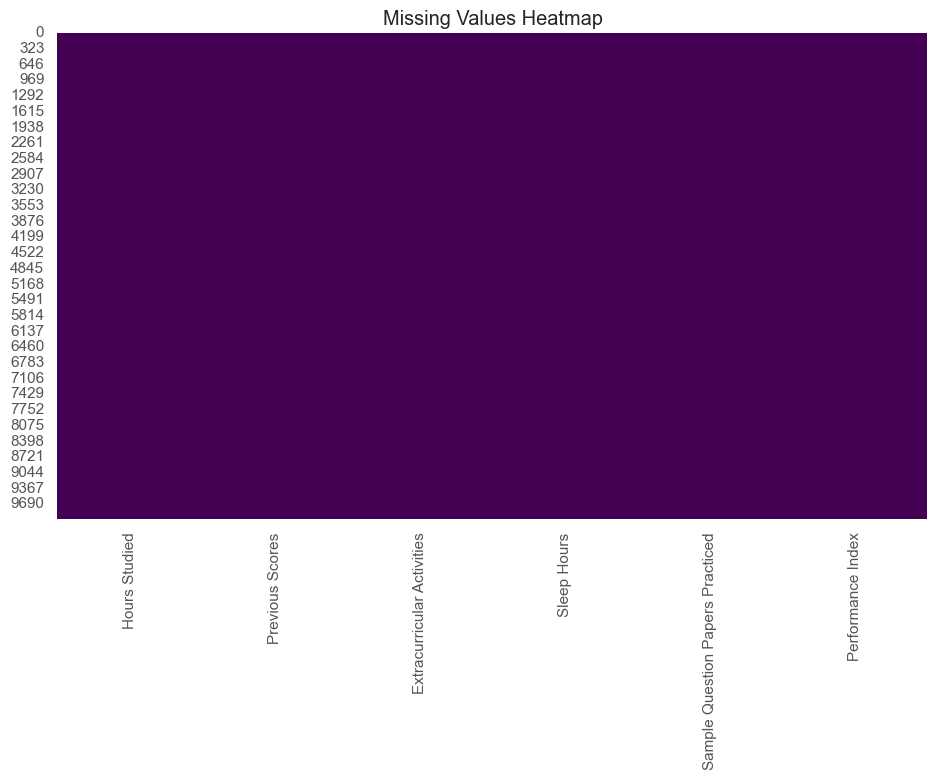

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

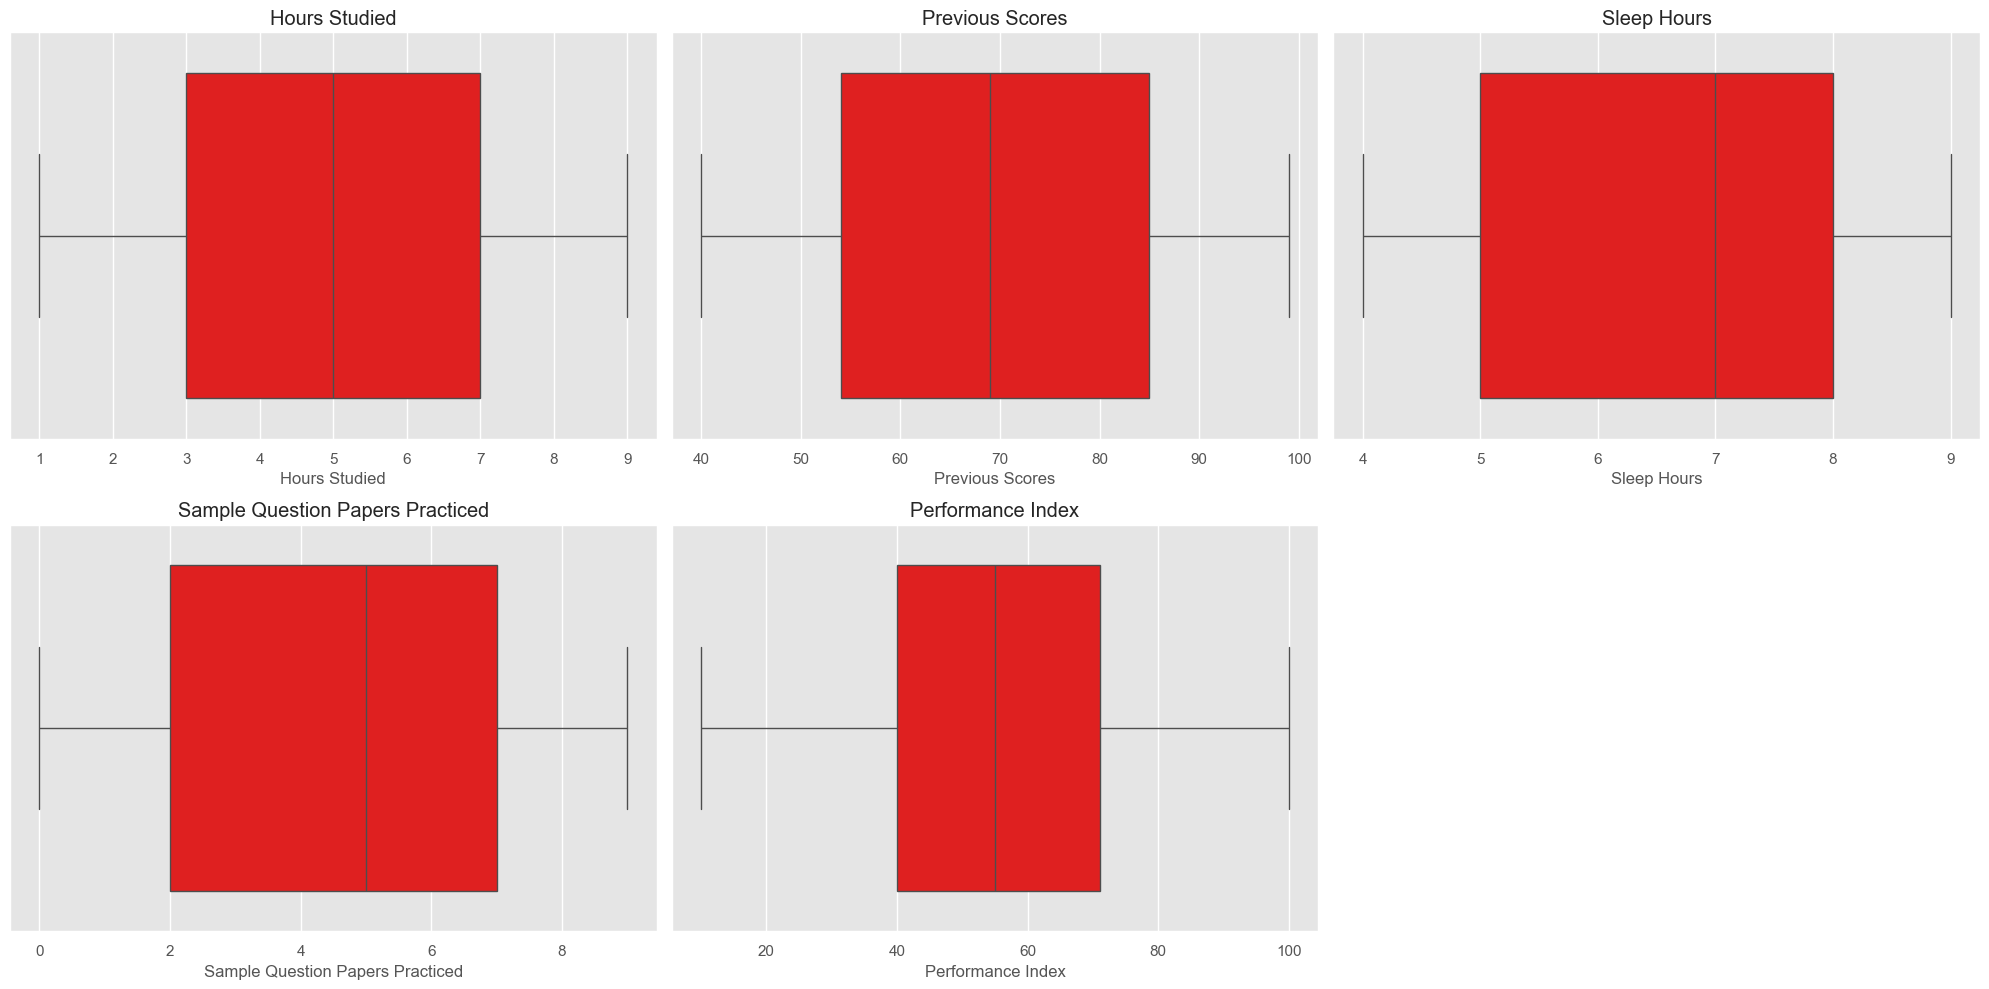

In [21]:
# Define number of rows and columns for the grid
num_cols_length = len(num_cols)
n_rows = (num_cols_length // 3) + (num_cols_length % 3 > 0)  # 3 columns per row, adjust rows accordingly

# Create subplots grid
fig, axes = plt.subplots(n_rows, 3, figsize=(20, n_rows * 5))  # 3 plots per row, adjust size for better visibility
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each boxplot in the grid
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], color="red", ax=axes[i])
    axes[i].set_title(col)  # Set title for each plot based on the column name

# Hide any remaining empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [22]:
#Step 1.5: Outlier Detection

outlier_results = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outlier_results[col] = ((df[col] < lower_fence) | (df[col] > upper_fence)).sum()

# Display outlier count per column
print(pd.DataFrame.from_dict(outlier_results, orient='index', columns=['Outliers Count']))

                                  Outliers Count
Hours Studied                                  0
Previous Scores                                0
Sleep Hours                                    0
Sample Question Papers Practiced               0
Performance Index                              0


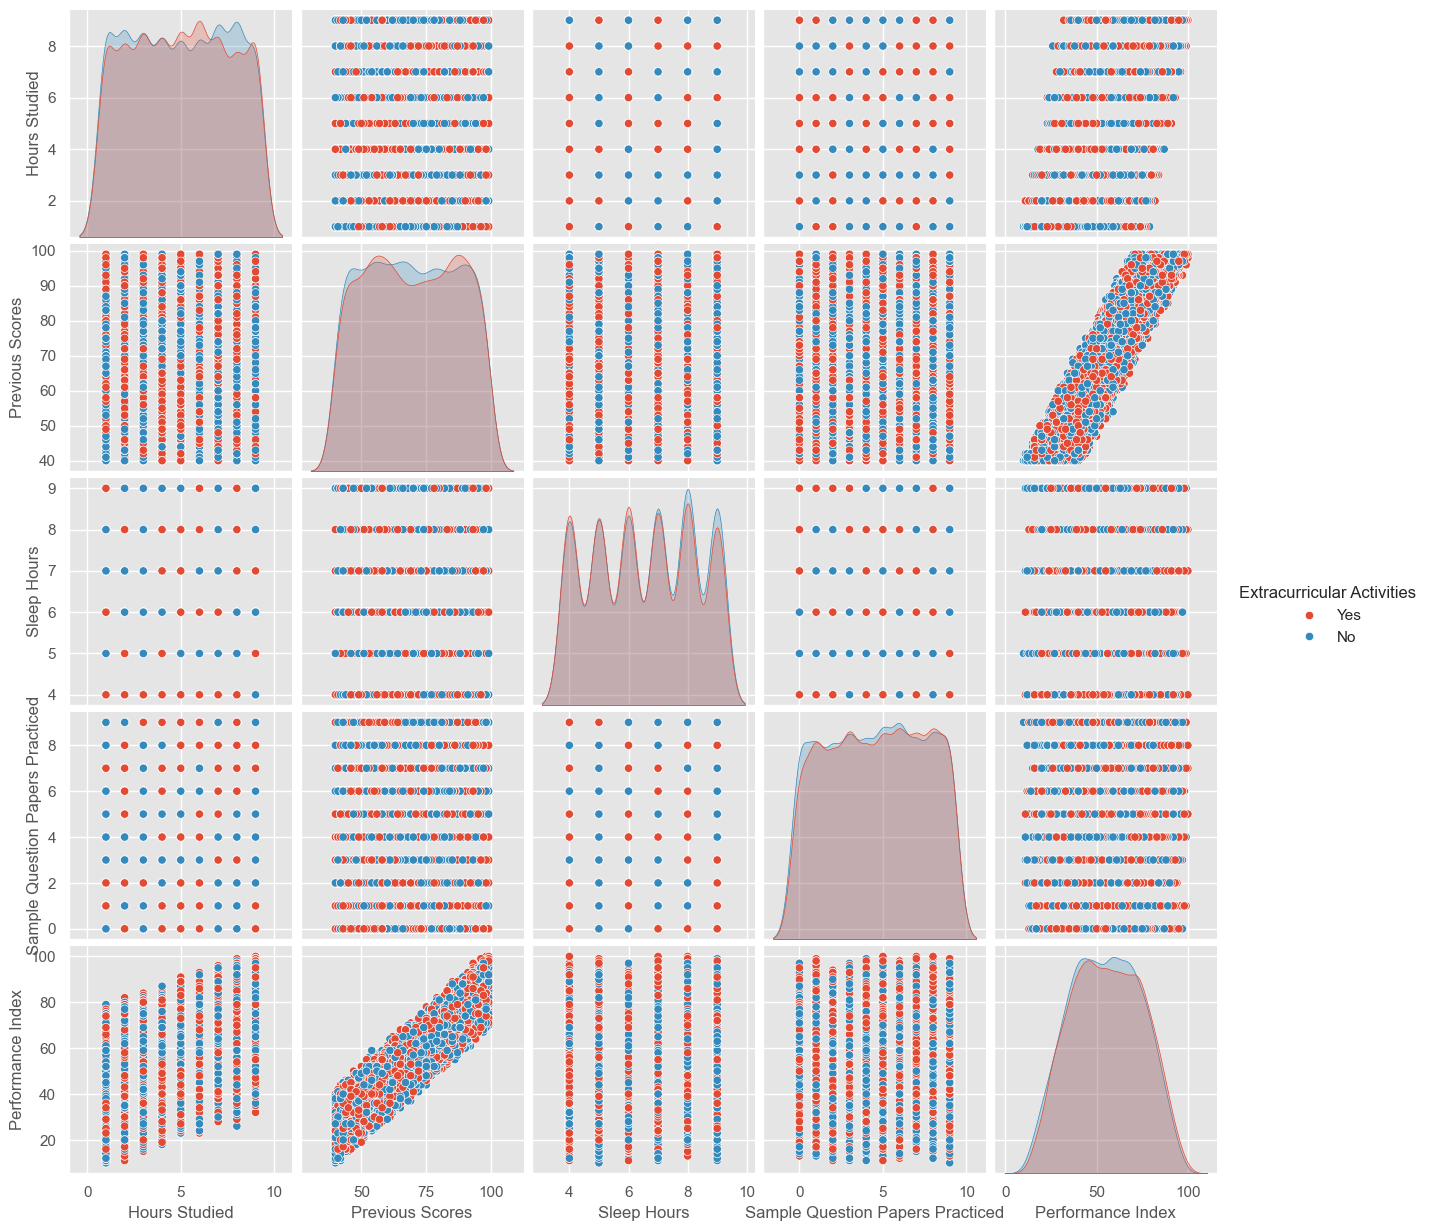

In [25]:
# Pairplot
sns.pairplot(df[num_cols + ["Extracurricular Activities"]], hue="Extracurricular Activities")

### Step 2: Correlations

Step 2.3: Create New Datasets

In [37]:
# Creating datasets based on correlations
high_corr_pairs = [(col1, col2) for col1 in num_cols for col2 in num_cols if col1 != col2 and pearson_corr.loc[col1, col2] > 0.7]
high_corr_pairs

[('Previous Scores', 'Performance Index'),
 ('Performance Index', 'Previous Scores')]

In [38]:
# Create a copy of the original DataFrame
df_wo_corr = df.copy()

In [39]:
# Iterate over each pair of high correlation columns
for col1, col2 in high_corr_pairs:
    # Check if col1 is still in the copied DataFrame
    if col1 in df_wo_corr.columns:
        df_wo_corr = df_wo_corr.drop(columns=[col1])  # Drop col1 from the copied DataFrame
        print(f"Dropped {col1} from DataFrame copy")

# Check the resulting DataFrame columns
print("Remaining columns in the modified DataFrame:", df_wo_corr.columns.tolist())
print("Original DataFrame columns remain unchanged:", df.columns.tolist())

Dropped Previous Scores from DataFrame copy
Dropped Performance Index from DataFrame copy
Remaining columns in the modified DataFrame: ['Hours Studied', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
Original DataFrame columns remain unchanged: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


In [40]:
df_wo_corr.dtypes

Hours Studied                       float64
Extracurricular Activities           object
Sleep Hours                         float64
Sample Question Papers Practiced    float64
dtype: object

In [41]:

cat_cols_wo_corr= [col for col in df_wo_corr.columns if df_wo_corr[col].dtype == 'object']
num_cols_wo_corr= [col for col in df_wo_corr.columns if df_wo_corr[col].dtype != 'object']

In [42]:
cat_cols_wo_corr

['Extracurricular Activities']

In [43]:
num_cols_wo_corr

['Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced']

In [44]:
len(df_wo_corr.columns)

4

### Step 3: Feature Engineering

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.feature_selection import chi2
import numpy as np
# label_encoder
from sklearn.preprocessing import LabelEncoder

In [47]:
for col in cat_cols_wo_corr:
    print(f"{col} has {df_wo_corr[col].nunique()}")

Extracurricular Activities has 2


In [48]:
le = LabelEncoder()

for col in cat_cols_wo_corr:
    df_wo_corr[col] = le.fit_transform(df_wo_corr[col])

In [51]:
cat_cols_wo_corr.remove("Extracurricular Activities")
cat_cols_wo_corr

[]

In [52]:
df_wo_corr.columns

Index(['Hours Studied', 'Extracurricular Activities', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')

In [55]:
from sklearn.model_selection import train_test_split

X = df_wo_corr.drop(columns=['Extracurricular Activities'])  # Features
y = df_wo_corr['Extracurricular Activities']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:

encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap
X_train_encoded = encoder.fit_transform(X_train[cat_cols_wo_corr])
X_test_encoded = encoder.transform(X_test[cat_cols_wo_corr])

# Create DataFrames from the encoded features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(cat_cols_wo_corr))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(cat_cols_wo_corr))


In [275]:
# Step 4: Robust Scaling for Numerical Columns

In [57]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols_wo_corr])
X_test_scaled = scaler.transform(X_test[num_cols_wo_corr])


In [58]:
# Create DataFrames from the scaled features
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=num_cols_wo_corr)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=num_cols_wo_corr)

In [59]:
X_train_processed = pd.concat([X_train_scaled_df.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test_processed = pd.concat([X_test_scaled_df.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

In [60]:
print("Shape of training set with X_train_processed :", X_train_processed.shape)
print("Shape of test set with X_test_processed:", X_test_processed.shape)

Shape of training set with X_train_processed : (8000, 3)
Shape of test set with X_test_processed: (2000, 3)


In [61]:
len(X_test_processed.columns)

3

In [62]:
X_train_processed.columns

Index(['Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced'], dtype='object')

In [63]:
cat_cols_wo_corr

[]

In [64]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [65]:
X_train_processed

,Hours Studied,Sleep Hours,Sample Question Papers Practiced
0,0.00,0.000000,0.0
1,-0.75,0.000000,0.2
2,-0.75,0.000000,-0.6
3,-0.75,-0.333333,-0.8
4,0.75,0.666667,-1.0
...,...,...,...
7995,0.75,-0.333333,0.2
7996,-0.25,0.666667,-0.4
7997,1.00,0.000000,0.2
7998,-1.00,0.666667,-1.0


In [66]:
k = 10  # Specify how many top features you want to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_kbest = selector.fit_transform(X_train_processed, y_train)

In [67]:
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train_processed.columns[selected_indices]

# Display the selected features and their scores
scores = selector.scores_[selected_indices]
mi_results = pd.DataFrame({'Feature': selected_features, 'Mutual Information Score': scores})

# Sort by Mutual Information Score
mi_results = mi_results.sort_values(by='Mutual Information Score', ascending=False)

print(mi_results)

                            Feature  Mutual Information Score
2  Sample Question Papers Practiced                  0.009449
0                     Hours Studied                  0.001340
1                       Sleep Hours                  0.000000


In [68]:
selected_features

Index(['Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced'], dtype='object')

In [69]:
# Create DataFrame with only the selected features from SelectKBest
X_train_kbest_df = X_train_processed[selected_features].copy()
X_test_kbest_df = X_test_processed[selected_features].copy()

In [70]:
print("Shape of training set with SelectKBest features:", X_train_kbest_df.shape)
print("Shape of test set with SelectKBest features:", X_test_kbest_df.shape)

Shape of training set with SelectKBest features: (8000, 3)
Shape of test set with SelectKBest features: (2000, 3)


Apply PCA for Dimensionality Reduction

In [75]:
from sklearn.decomposition import PCA

# Define number of components for PCA
n_components = 3  # You can adjust this number based on explained variance

# Initialize PCA and apply to the processed data
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Create DataFrames for PCA-transformed data
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

print("Shape of training set with PCA-reduced features:", X_train_pca_df.shape)
print("Shape of test set with PCA-reduced features:", X_test_pca_df.shape)


Shape of training set with PCA-reduced features: (8000, 3)
Shape of test set with PCA-reduced features: (2000, 3)


In [76]:
pca.explained_variance_

array([0.42119811, 0.32717213, 0.32047174])

In [77]:
(pca.explained_variance_ratio_)

array([0.39406958, 0.30609963, 0.2998308 ])

### Modeling

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [80]:
# Function for model evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Get predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Train and test accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Print accuracy and classification report
    print(f"\n{model_name} - Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
    print(f"Classification Report (Test):\n{classification_report(y_test, y_test_pred)}")

    # Plot confusion matrix
 #   ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
 #   plt.title(f"{model_name} - Confusion Matrix (Test)")
 #   plt.show()
    
    return train_acc, test_acc

In [81]:
# Plotting precision-recall for multiple algorithms
def plot_precision_recall(model, X_test, y_test, model_name):
    from sklearn.metrics import precision_recall_curve

    # Compute Precision-Recall curve
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    # Plot Precision-Recall curve
    plt.plot(recall, precision, label=f'{model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve for {model_name}')
    plt.legend()
    plt.show()

In [82]:
# Function to plot ROC-AUC curve
def plot_roc_auc(model, X_test, y_test, model_name):
    y_score = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC curve for {model_name}')
    plt.legend()
    plt.show()

In [83]:
# Function to plot combined ROC-AUC curves for multiple models
def plot_combined_roc_auc(models, X_test, y_test, section_title):
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        y_score = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Combined ROC-AUC Curve for {section_title}')
    plt.legend()
    plt.show()

#### Modeling Using No Feature Selection


*** Running Models on X_train_processed and X_test_processed ***

Logistic Regression - Train Accuracy: 0.51, Test Accuracy: 0.52
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.52      0.66      0.58      1009
           1       0.52      0.37      0.43       991

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.50      2000
weighted avg       0.52      0.52      0.51      2000



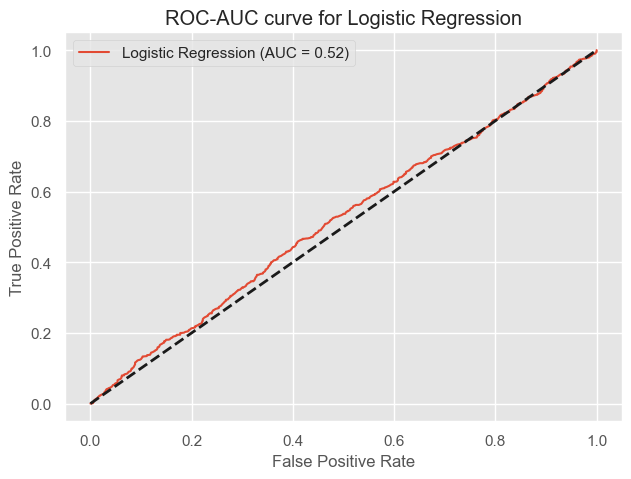


Support Vector Classifier - Train Accuracy: 0.51, Test Accuracy: 0.52
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1009
           1       0.51      0.51      0.51       991

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000



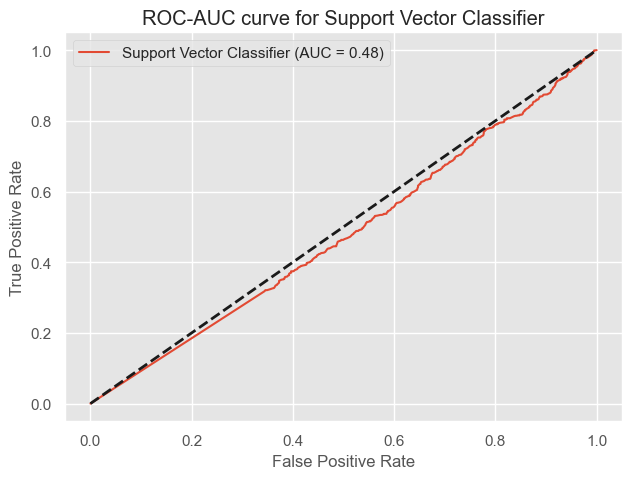


Decision Tree - Train Accuracy: 0.53, Test Accuracy: 0.52
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.52      0.61      0.56      1009
           1       0.52      0.42      0.47       991

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.51      2000
weighted avg       0.52      0.52      0.51      2000



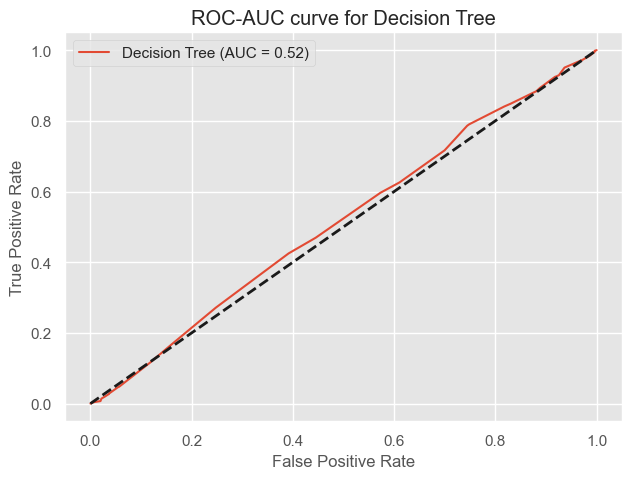


Random Forest - Train Accuracy: 0.60, Test Accuracy: 0.49
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      1009
           1       0.49      0.48      0.48       991

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



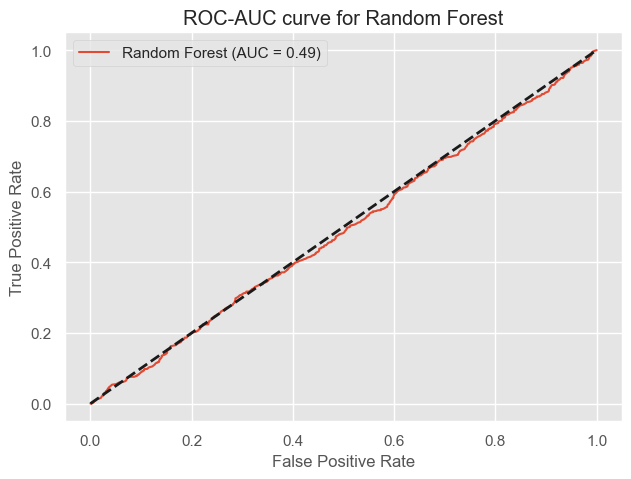


Gradient Boosting - Train Accuracy: 0.53, Test Accuracy: 0.50
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.51      0.65      0.57      1009
           1       0.50      0.35      0.41       991

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.49      2000



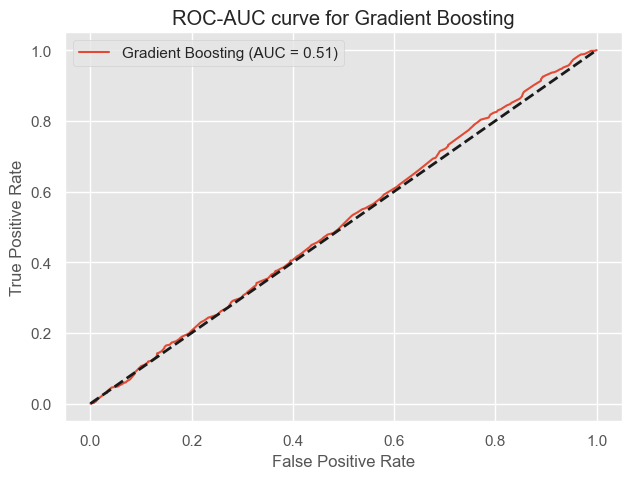

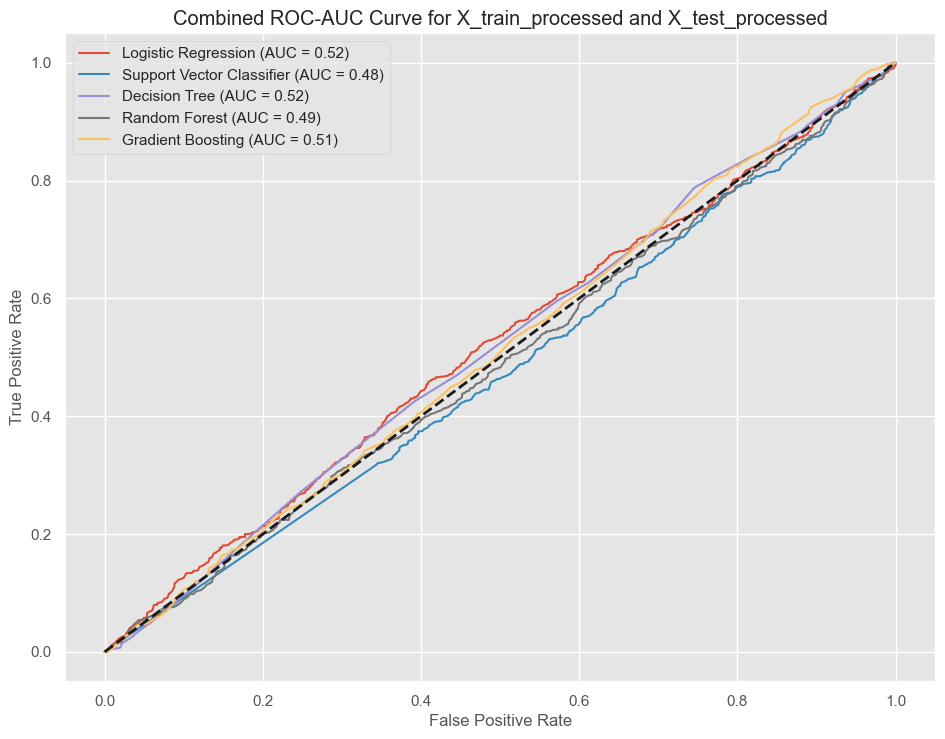

In [85]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
    
}

param_grids = {
    "Logistic Regression": {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    "Support Vector Classifier": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "Decision Tree": {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [50, 100], 'max_depth': [10, 15], 'min_samples_split': [2, 5]},
    "Gradient Boosting": {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100]},
    "XGBoost": {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100], 'max_depth': [3, 5]}
}
trained_models = {}
print("\n*** Running Models on X_train_processed and X_test_processed ***")
for model_name, model in models.items():
    grid = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_processed, y_train)
    best_model = grid.best_estimator_
    trained_models[model_name] = best_model 

    train_acc, test_acc = evaluate_model(best_model, X_train_processed, X_test_processed, y_train, y_test, model_name)
    plot_roc_auc(best_model, X_test_processed, y_test, model_name)
# Plot combined ROC-AUC for all models in Section 1
plot_combined_roc_auc(trained_models, X_test_processed, y_test, "X_train_processed and X_test_processed")

#### Modeling Using Mutual-Info Feature Selection


*** Running Models on X_train_kbest_df and X_test_kbest_df ***

Logistic Regression - Train Accuracy: 0.51, Test Accuracy: 0.52
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.52      0.66      0.58      1009
           1       0.52      0.37      0.43       991

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.50      2000
weighted avg       0.52      0.52      0.51      2000



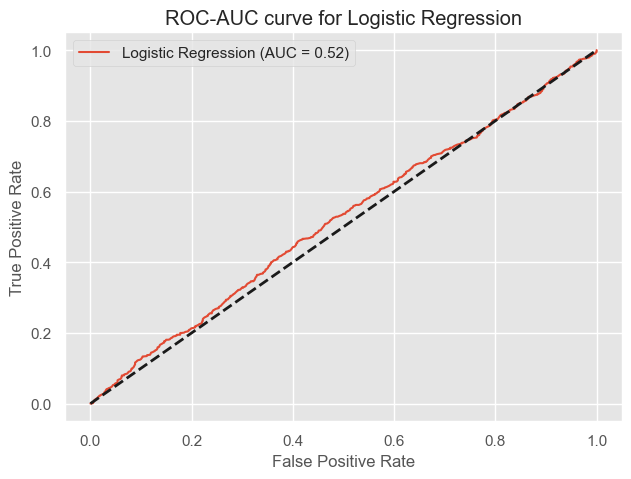


Support Vector Classifier - Train Accuracy: 0.51, Test Accuracy: 0.52
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1009
           1       0.51      0.51      0.51       991

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000



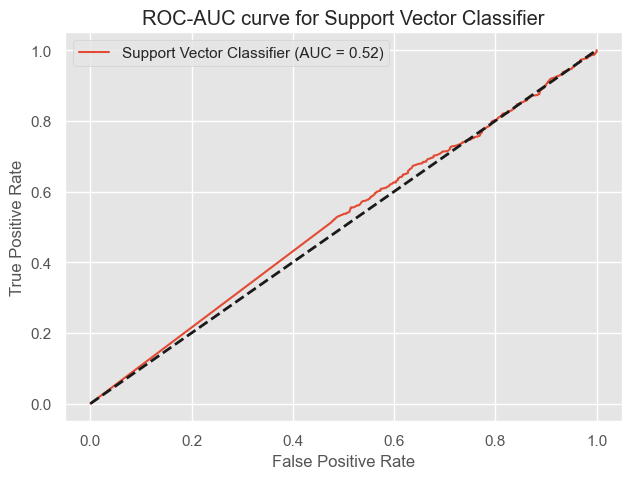


Decision Tree - Train Accuracy: 0.53, Test Accuracy: 0.52
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.52      0.61      0.56      1009
           1       0.52      0.42      0.47       991

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.51      2000
weighted avg       0.52      0.52      0.51      2000



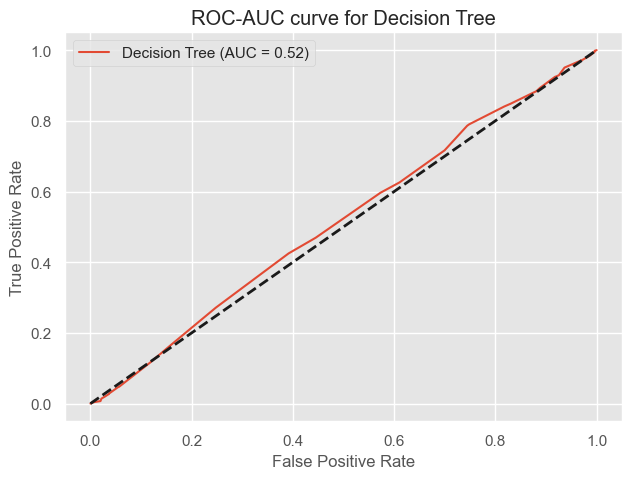


Random Forest - Train Accuracy: 0.60, Test Accuracy: 0.50
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1009
           1       0.49      0.47      0.48       991

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



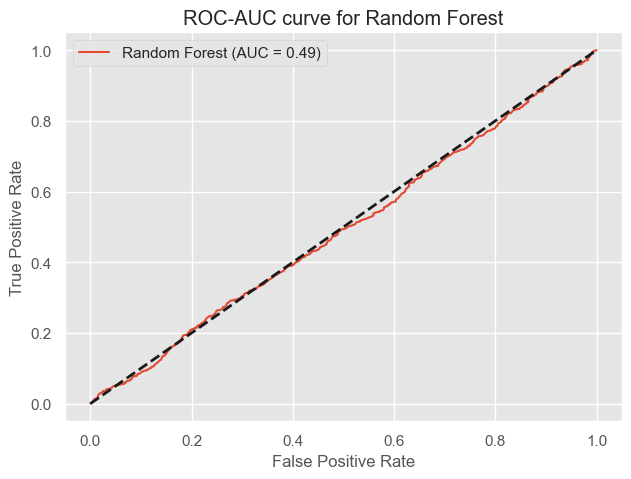


Gradient Boosting - Train Accuracy: 0.53, Test Accuracy: 0.50
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.51      0.65      0.57      1009
           1       0.50      0.35      0.41       991

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.49      2000



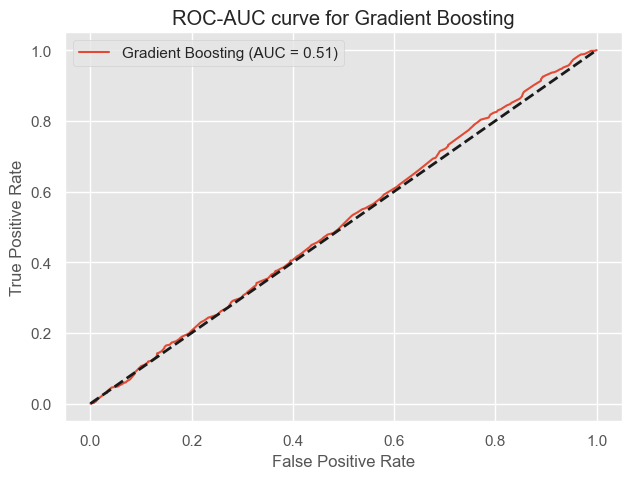

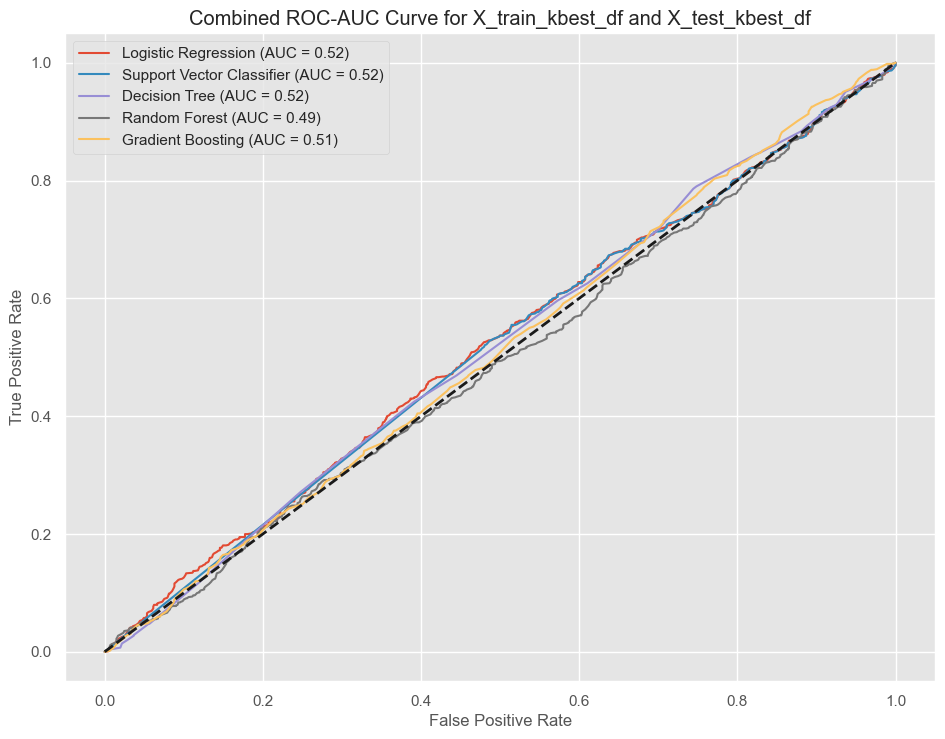

In [86]:
print("\n*** Running Models on X_train_kbest_df and X_test_kbest_df ***")
trained_models = {}
for model_name, model in models.items():
    grid = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_kbest_df, y_train)
    best_model = grid.best_estimator_
    trained_models[model_name] = best_model  # Store the best model for later ROC-AUC plotting
    train_acc, test_acc = evaluate_model(best_model, X_train_kbest_df, X_test_kbest_df, y_train, y_test, model_name)
    plot_roc_auc(best_model, X_test_kbest_df, y_test, model_name)

# Plot combined ROC-AUC for all models in Section 2
plot_combined_roc_auc(trained_models, X_test_kbest_df, y_test, "X_train_kbest_df and X_test_kbest_df")

#### Modeling Using PCA 


*** Running Models on X_train_pca_df and X_test_pca_df ***

Logistic Regression - Train Accuracy: 0.51, Test Accuracy: 0.52
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.52      0.66      0.58      1009
           1       0.52      0.37      0.43       991

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.50      2000
weighted avg       0.52      0.52      0.51      2000



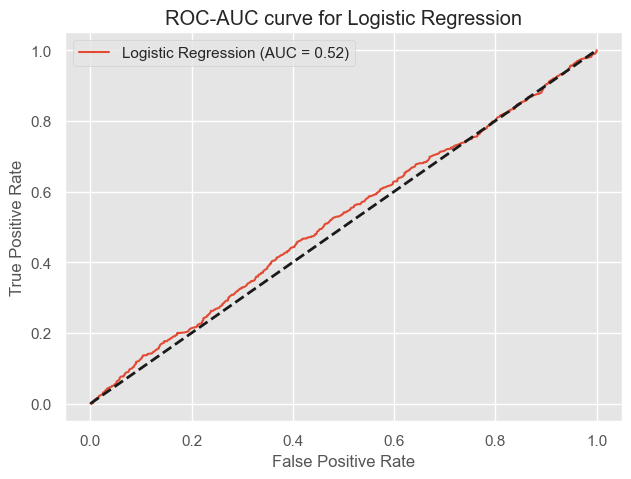


Support Vector Classifier - Train Accuracy: 0.51, Test Accuracy: 0.52
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1009
           1       0.51      0.51      0.51       991

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000



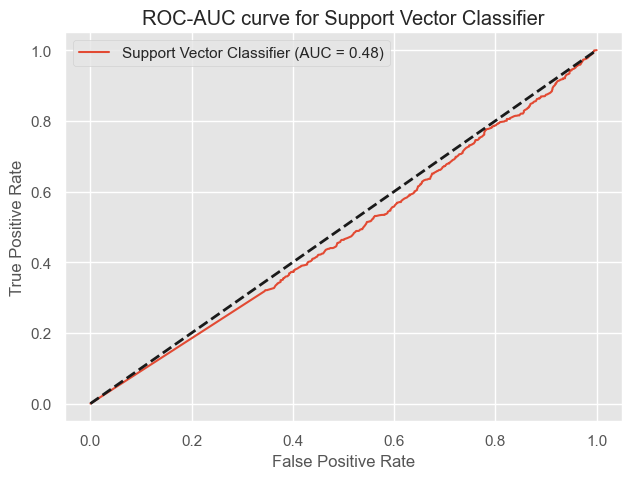


Decision Tree - Train Accuracy: 0.54, Test Accuracy: 0.49
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.49      0.46      0.48      1009
           1       0.48      0.51      0.50       991

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



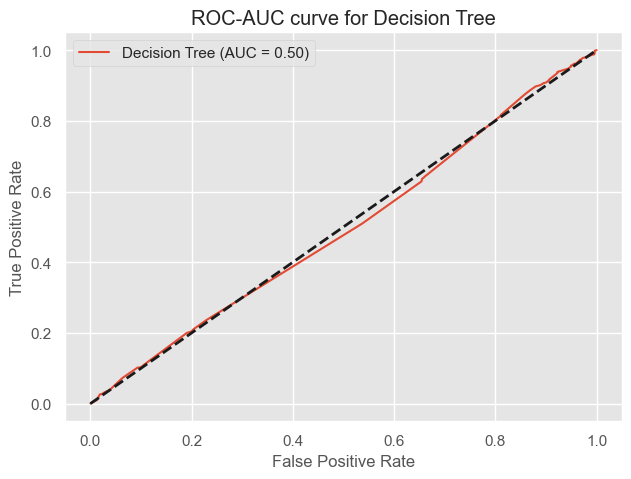


Random Forest - Train Accuracy: 0.60, Test Accuracy: 0.50
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1009
           1       0.49      0.47      0.48       991

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



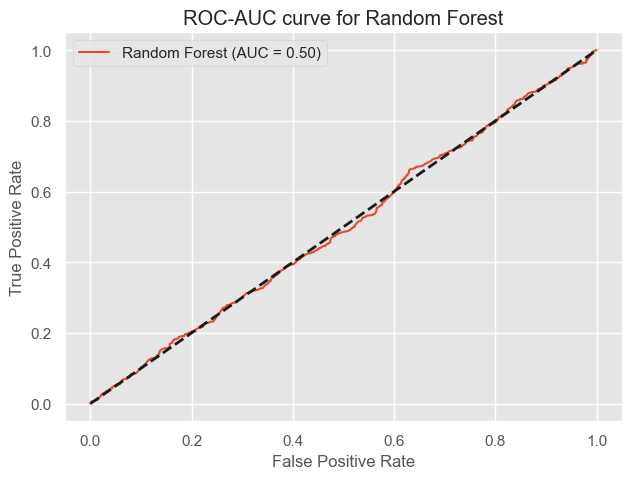


Gradient Boosting - Train Accuracy: 0.53, Test Accuracy: 0.51
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.51      0.64      0.57      1009
           1       0.50      0.37      0.43       991

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.51      0.50      2000



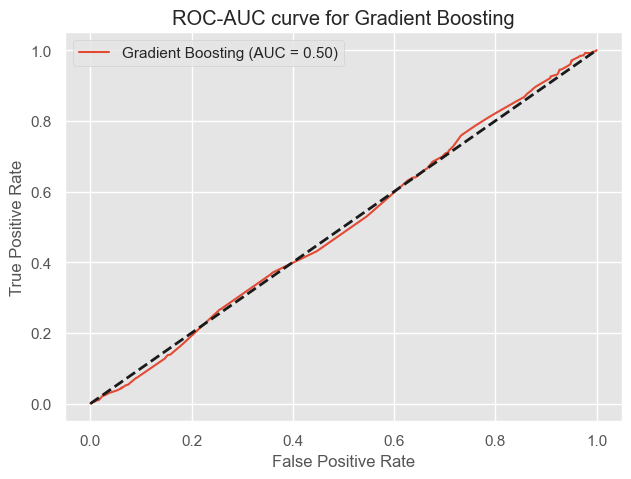

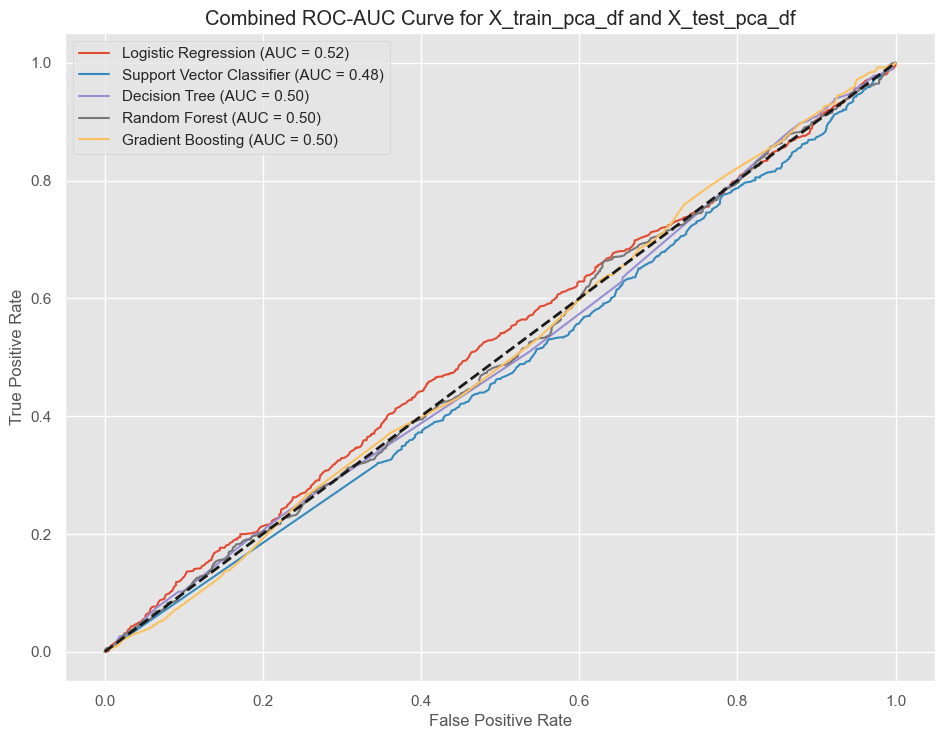

In [87]:
print("\n*** Running Models on X_train_pca_df and X_test_pca_df ***")
for model_name, model in models.items():
    grid = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_pca_df, y_train)
    best_model = grid.best_estimator_
    trained_models[model_name] = best_model  # Store the best model for later ROC-AUC plotting

    train_acc, test_acc = evaluate_model(best_model, X_train_pca_df, X_test_pca_df, y_train, y_test, model_name)
    plot_roc_auc(best_model, X_test_pca_df, y_test, model_name)
    
# Plot combined ROC-AUC for all models in Section 3
plot_combined_roc_auc(trained_models, X_test_pca_df, y_test, "X_train_pca_df and X_test_pca_df")